# Imports

In [ ]:
!pip install opendatasets


In [ ]:
!pip install keras

In [ ]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,  Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [ ]:
# {"username":"dohahemdan202200701","key":"8a1b9a20d5913d905f3f3658f4243bd5"}

# Dataset Exploration

In [ ]:

od.download(
   "https://www.kaggle.com/datasets/gaurav2022/mobile-health/data")

Skipping, found downloaded files in "./mobile-health" (use force=True to force download)


In [ ]:
df = pd.read_csv("/content/mobile-health/mhealth_raw_data.csv")

<Axes: xlabel='Activity'>

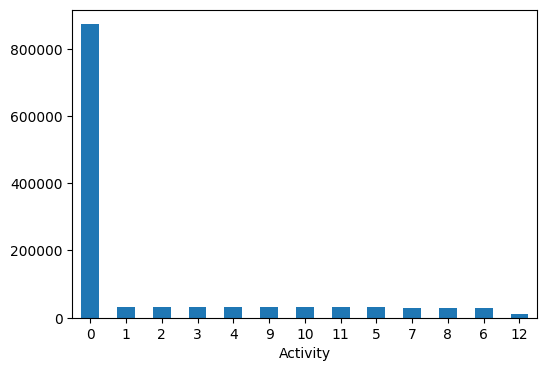

In [ ]:
plt.figure(figsize=(6 ,4 ))
df['Activity'].value_counts().plot.bar(rot=0)

In [ ]:
activity_code_12_count = df['Activity'].value_counts().get(12, 0)
print("Number of activities with code 12:", activity_code_12_count)


Number of activities with code 12: 10342


In [ ]:
balanced_data = []

for activity_code in range(12):
    activity_subset = df[df['Activity'] == activity_code]
    if len(activity_subset) > activity_code_12_count:
        balanced_data.append(activity_subset.sample(n=activity_code_12_count, random_state=42))
    else:
        balanced_data.append(activity_subset)
balanced_df = pd.concat(balanced_data)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
balanced_df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,3.44990,-9.8783,-3.66770,0.842300,0.082552,-0.345780,-12.25100,-11.7870,8.29610,-0.178430,-0.53799,0.42241,0,subject9
1,0.56394,-10.8370,-6.48410,0.126160,-0.874300,-0.035363,2.10170,-5.8577,8.22790,0.541180,-0.26078,0.99784,9,subject5
2,6.28940,-19.3350,-9.77890,0.137290,-0.540340,-0.919450,-12.22900,5.3518,-2.81570,0.160780,-1.06570,-0.30603,11,subject6
3,0.71383,-9.8084,0.35005,0.589980,-0.818010,-0.530450,-7.15300,-2.4309,5.90970,-0.086275,-0.78645,0.55172,2,subject10
4,0.83887,-9.6961,-0.29933,-0.163270,-0.849910,-0.563850,-3.80340,-8.9955,1.44610,0.068627,-1.04720,-0.34698,0,subject6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124099,6.70170,-19.1560,7.14050,0.241190,-0.590990,-0.862480,-20.64400,-18.9320,-18.22800,-0.449020,-0.71047,-0.63793,11,subject6
124100,0.34155,-19.2100,3.72000,-0.202230,-0.262660,-1.064800,-4.57880,2.6640,0.40404,-0.562750,-0.86242,-0.36638,10,subject10
124101,3.08930,-8.2224,-5.41150,-0.040816,-0.921200,-0.055010,-7.74100,0.1432,7.31970,-0.719610,0.86448,0.51509,0,subject2
124102,-0.90426,-9.4836,2.13140,-0.484230,-0.577860,0.638510,-0.56339,-9.9225,0.75388,-0.711760,-0.80698,0.21983,1,subject4


<Axes: xlabel='Activity'>

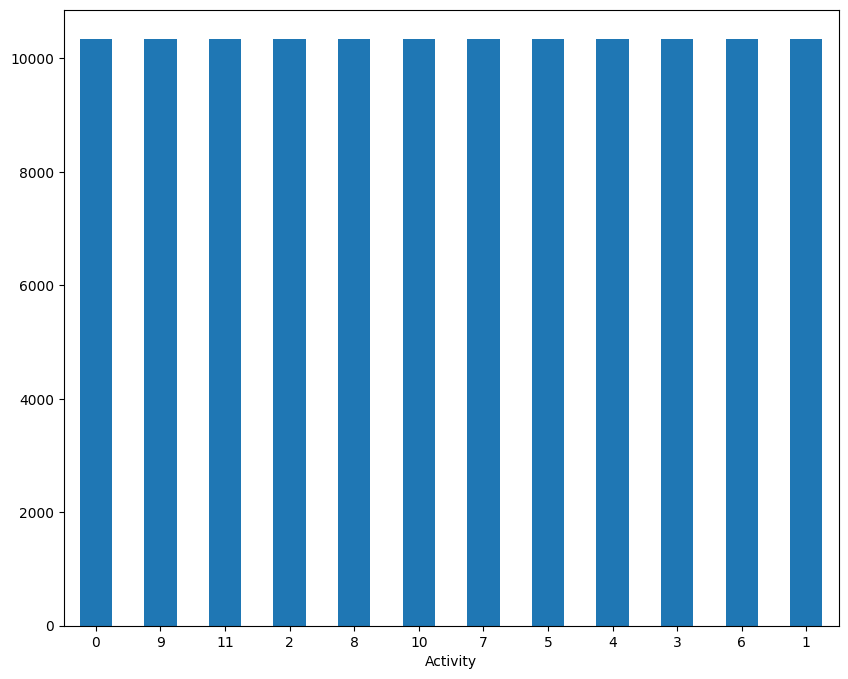

In [ ]:
plt.figure(figsize=(10 ,8 ))
balanced_df['Activity'].value_counts().plot.bar(rot=0)

In [ ]:
numeric_columns = balanced_df.select_dtypes(include=['number'])
z_scores = stats.zscore(numeric_columns)
threshold = 3
filtered_data = balanced_df[(z_scores < threshold).all(axis=1)]
outliers_removed = len(balanced_df) - len(filtered_data)
balanced_df = filtered_data
print("Number of outliers removed:", outliers_removed)


Number of outliers removed: 7971


In [ ]:
balanced_df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,3.44990,-9.8783,-3.66770,0.842300,0.082552,-0.345780,-12.25100,-11.7870,8.29610,-0.178430,-0.53799,0.42241,0,subject9
1,0.56394,-10.8370,-6.48410,0.126160,-0.874300,-0.035363,2.10170,-5.8577,8.22790,0.541180,-0.26078,0.99784,9,subject5
2,6.28940,-19.3350,-9.77890,0.137290,-0.540340,-0.919450,-12.22900,5.3518,-2.81570,0.160780,-1.06570,-0.30603,11,subject6
3,0.71383,-9.8084,0.35005,0.589980,-0.818010,-0.530450,-7.15300,-2.4309,5.90970,-0.086275,-0.78645,0.55172,2,subject10
4,0.83887,-9.6961,-0.29933,-0.163270,-0.849910,-0.563850,-3.80340,-8.9955,1.44610,0.068627,-1.04720,-0.34698,0,subject6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124099,6.70170,-19.1560,7.14050,0.241190,-0.590990,-0.862480,-20.64400,-18.9320,-18.22800,-0.449020,-0.71047,-0.63793,11,subject6
124100,0.34155,-19.2100,3.72000,-0.202230,-0.262660,-1.064800,-4.57880,2.6640,0.40404,-0.562750,-0.86242,-0.36638,10,subject10
124101,3.08930,-8.2224,-5.41150,-0.040816,-0.921200,-0.055010,-7.74100,0.1432,7.31970,-0.719610,0.86448,0.51509,0,subject2
124102,-0.90426,-9.4836,2.13140,-0.484230,-0.577860,0.638510,-0.56339,-9.9225,0.75388,-0.711760,-0.80698,0.21983,1,subject4


In [ ]:
balanced_df.drop(columns =["subject"], inplace = True)

<ipython-input-15-b7408080abcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df.drop(columns =["subject"], inplace = True)


In [ ]:
y = balanced_df["Activity"]
X = balanced_df.drop(columns = ["Activity"])

### Visualization

In [ ]:
label_encoder = LabelEncoder()
balanced_df['Activity'] = label_encoder.fit_transform(balanced_df['Activity'])


# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

<ipython-input-32-13ab42e6e8fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['Activity'] = label_encoder.fit_transform(balanced_df['Activity'])


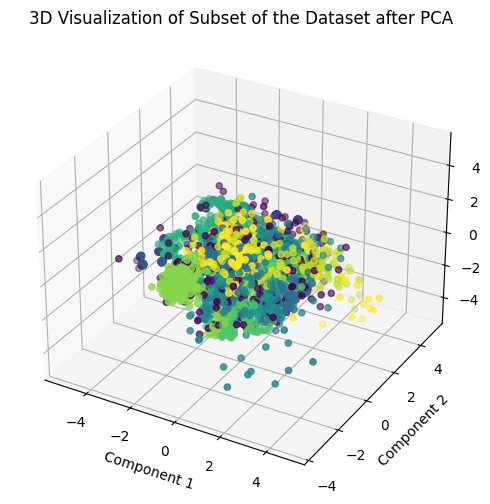

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:5000, 0], X_pca[:5000, 1], X_pca[:5000, 2], c=y[:5000], cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Visualization of Subset of the Dataset after PCA')
plt.show()

In [ ]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Linear Regression

In [ ]:
''' Linear Regression with MSE 8.71 is acceptable and as cross validation provided
 variablitiy of 0.04 means that this result is consistent over different folds. '''

' Linear Regression with MSE 8.95 is acceptable and as cross validation provided\n variablitiy of 0.06 means that this result is consistent over different folds. '

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
cv_mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
cv_mse = -cv_mse
print("Cross-Validation Mean Squared Error:", cv_mse.mean())
print("Cross-Validation Standard Deviation of MSE:", cv_mse.std())


Mean Squared Error: 8.708685150947296
Cross-Validation Mean Squared Error: 8.681232651284377
Cross-Validation Standard Deviation of MSE: 0.03908213959800978


In [ ]:
''' Ridge and Linear regression with the same results '''

' Ridge and Linear regression with the same results '

In [ ]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)


Ridge Regression Mean Squared Error: 8.708685155440516


In [ ]:
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)

Lasso Regression Mean Squared Error: 8.70867608596962


# Logistic Regression

In [ ]:
def calc(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_test, y_pred, average='weighted')
  print("Precision:", precision)
  recall = recall_score(y_test, y_pred, average='weighted')
  print("Recall:", recall)
  f1 = f1_score(y_test, y_pred, average='weighted')
  print("F1-score:", f1)
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.tight_layout()
  plt.show()

Accuracy: 0.6006406282289729
Precision: 0.5799288226418122
Recall: 0.6006406282289729
F1-score: 0.5846901744492559
Confusion Matrix:


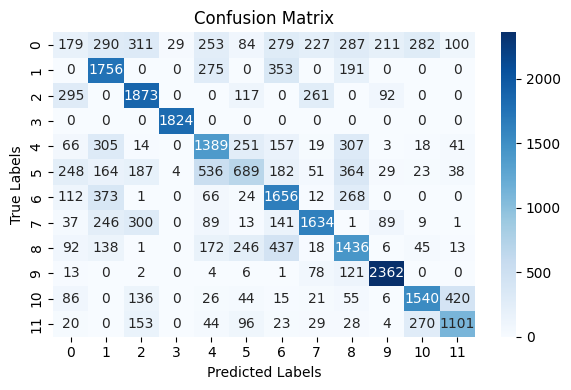

Cross-Validation Accuracy: 0.6062359825694352
Cross-Validation Standard Deviation of Accuracy: 0.0030410955049859235


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
calc(y_test, y_pred)
cv_accuracy = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_accuracy.mean())
print("Cross-Validation Standard Deviation of Accuracy:", cv_accuracy.std())


# KNN

Accuracy: 0.9419301508576152
Precision: 0.9427629912341016
Recall: 0.9419301508576152
F1-score: 0.9369391859552565
Confusion Matrix:


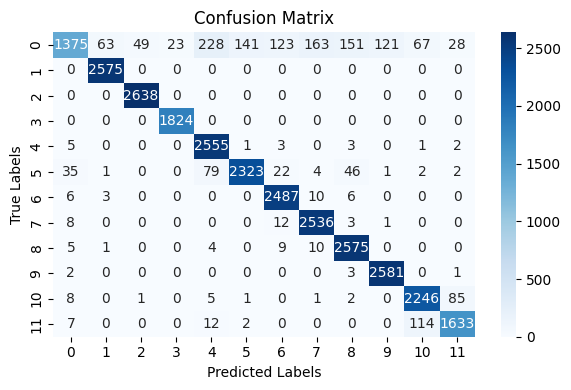

Cross-Validation Accuracy: 0.944864926039988
Cross-Validation Standard Deviation of Accuracy: 0.001165681740109988


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
calc(y_test, predictions)
cv_accuracy = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_accuracy.mean())
print("Cross-Validation Standard Deviation of Accuracy:", cv_accuracy.std())

#SVM

Accuracy: 0.923055727767445
Precision: 0.9219221699559381
Recall: 0.923055727767445
F1-score: 0.9179767171113593
Confusion Matrix:


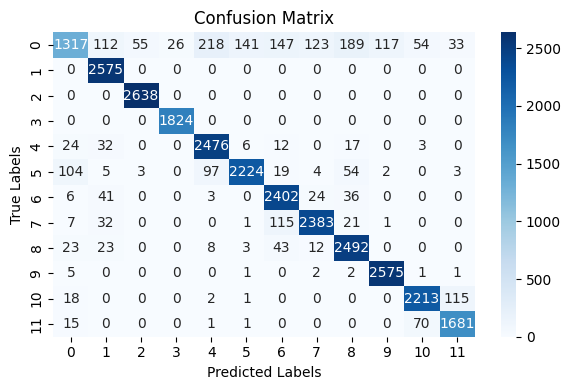

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
calc(y_test, y_pred)


# Neural Netwroks

In [ ]:
num_classes = 13

In [ ]:
y_train_onehot = np.eye(num_classes)[y_train]
y_test_onehot = np.eye(num_classes)[y_test]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 13)                845       
                                                                 
Total params: 5837 (22.80 KB)
Trainable params: 5837 (22.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
2178/2178 [==============================] - 7s 3ms/step - loss: 0.7496 - accuracy: 0.7625 - val_loss: 0.4833 - val_accuracy: 0.8468
Epoch 2/30
2178/2178 [==============================] - 4s 2ms/step - loss: 0.4125 - accuracy: 0.8704 - val_loss: 0.3697 - val_accuracy: 0.885

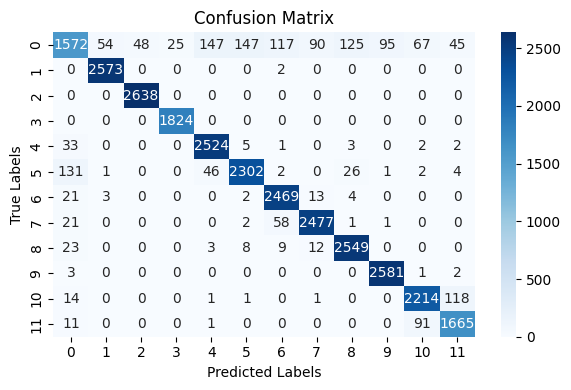

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train_onehot, epochs=30,  validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test_onehot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_cat = np.argmax(y_test_onehot, axis=1)
calc(y_test_cat, y_pred )

